## <p style="text-align: center;">Clusterização e algoritmo KMeans</p> 

Organizar dados em agrupamentos é um dos modos mais fundamentais de compreensão e aprendizado. Como por exemplo, os organismos em um sistema biologico são classificados em domínio, reino, filo, classe, etc. A análise de agrupamento é o estudo formal de métodos e algoritmos para agrupar objetos de acordo com medidas ou características semelhantes. A análise de cluster, em sua essência, não utiliza rótulos de categoria que marcam objetos com identificadores anteriores, ou seja, rótulos de classe. A ausência de informação de categoria distingue o agrupamento de dados (aprendizagem não supervisionada) da classificação ou análise discriminante (aprendizagem supervisionada). O objetivo da clusterização é encontrar estruturas em dados e, portanto, é de natureza exploratória. 

A técnica de Clustering tem uma longa e rica história em uma variedade de campos científicos. Um dos algoritmos de clusterização mais populares e simples, o K-means, foi publicado pela primeira vez em 1955. Apesar do K-means ter sido proposto há mais de 50 anos e milhares de algoritmos de clustering terem sido publicados desde então, o K-means é ainda amplamente utilizado.

Anil K. Jain, Data clustering: 50 years beyond K-means, Pattern Recognition Letters, Volume 31, Issue 8, 2010

## Objetivo

- Implementar as funções do algoritmo KMeans passo-a-passo
- Comparar a implementação com o algoritmo do Scikit-Learn
- Entender e codificar o Método do Cotovelo
- Utilizar o KMeans em um dataset real 

## Carregando os dados de teste

Carregue os dados disponibilizados, e identifique visualmente em quantos grupos a distribuição dos dados parece assumir

In [8]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
from matplotlib import pyplot as plt # data visualization

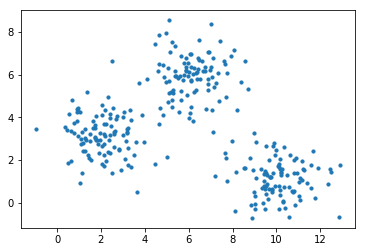

In [9]:
# load the data with pandas
dataset = pd.read_csv('dataset.csv', header=None)
dataset = np.array(dataset)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.show()

## 1. Implementar o algoritmo KMeans

Nesta etapa você irá implementar as funções que compõe o algoritmo do KMeans uma a uma. É importante entender e ler a documentação de cada função, principalmente as dimensões dos dados esperados na saída.

### 1.1 Inicializar os centróides

A primeira etapa do algoritmo consiste em inicializar os centróides de maneira aleatória. Essa etapa é uma das mais importantes do algoritmo e uma boa inicialização pode diminuir bastante o tempo de convergência.

Para inicializar os centróides você pode considerar o conhecimento prévio sobre os dados, mesmo sem saber a quantidade de grupos ou sua distribuição. 

> Dica: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html 

In [13]:
def calculate_initial_centers(dataset, k):
    """
    Inicializa os centróides iniciais de maneira arbitrária 
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    k -- Número de centróides desejados
    
    Retornos:
    centroids -- Lista com os centroides calculados - [k,n]
    """
    
    #### CODE HERE ####
    
    minimum = np.min(dataset, axis=0)
    maximum = np.max(dataset, axis=0)
    shape = [k, dataset.shape[1]]
    centroids = np.random.uniform(minimum, maximum, size=shape)
    
    ### END OF CODE ###
    
    return centroids

Teste a função criada e visualize os centróides que foram calculados.

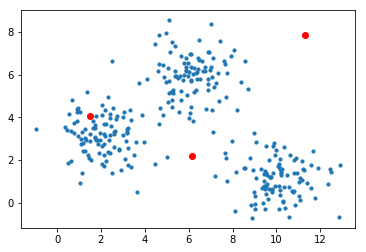

In [15]:
k = 3
centroids = calculate_initial_centers(dataset, k)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], c='red')
plt.show()

### 1.2 Definir os clusters

Na segunda etapa do algoritmo serão definidos o grupo de cada dado, de acordo com os centróides calculados.

#### 1.2.1 Função de distância 

Codifique a função de distância euclidiana entre dois pontos __(a, b)__.

Definido pela equação:

$$ d(a,b) = \sqrt{(a_1-b_1)^{2}+(a_2-b_2)^{2}+ ... + (a_n-b_n)^{2}} $$

$$ d(a,b) = \sqrt{\sum_{i=1}^{n}(a_i-b_i)^{2}} $$

In [30]:
def euclidean_distance(a, b):
    """
    Calcula a distância euclidiana entre os pontos a e b
    
    Argumentos:
    a -- Um ponto no espaço - [1,n]
    b -- Um ponto no espaço - [1,n]
    
    Retornos:
    distance -- Distância entre os pontos
    """
    
    #### CODE HERE ####
    
    distance = np.sqrt(np.sum(np.square(a-b)))
    
    ### END OF CODE ###
    
    return distance

Teste a função criada.

In [29]:
a = np.array([1, 5, 9])
b = np.array([3, 7, 8])

if (euclidean_distance(a,b) == 3):
    print("Distância calculada corretamente!")
else:
    print("Função de distância incorreta")

Distância calculada corretamente!
